<a href="https://colab.research.google.com/github/Mubashar-Bashir/Langchain_EcoSystem/blob/main/Excise_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# prompt: pip install langchain, langraph, google_genai, !pip install requests beautifulsoup4
%%capture --no-stderr
!pip install  -q -U  langchain
!pip install  -q -U langgraph
!pip install -q -U langchain-google-genai
!pip install -q -U requests beautifulsoup4



In [17]:
# Import required libraries
import requests
from bs4 import BeautifulSoup

In [18]:
from google.colab import userdata
google_api_key = userdata.get('Gemini-key')

In [19]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

In [20]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate

from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

import os

In [ ]:
# 1. State
#      prompt = str
# 2. Nodes
  # - Classification
  # - Entity Extraction

# 3. Edges

# 4. Graph

# 5. Run

In [ ]:
# from typing import Annotated
# from langgraph.graph.message import add_messages

# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
#sample state
# class State(TypedDict):
#     query: str
#     category: str
#     sentiment: str
#     response: str

In [21]:
# Excis & Taxation Basic state prompt_query , sentiment, department
from typing_extensions import TypedDict

class State(TypedDict):
  query: str
  Sentiment_analysis: str
  category: str  # department ["MVR", "UIPT", "Prof Tax", "HIPT", "Excise-Duty", "Cotton_Fee", "General"]
  #department:list[str]=["MVR", "UIPT", "Prof Tax", "HIPT", "Excise-Duty", "Cotton_Fee", "General"]
  #summary: str


In [27]:
def categorize(state: State) -> State:
    """Categorize the customer query into ["MVR", "UIPT", "Prof Tax", "HIPT", "Excise-Duty", "Cotton_Fee", "General"]"""
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following customer query into one of these categories: "
        "MVR, UIPT, Prof Tax, HIPT, Excise-Duty, Cotton_Fee, General. Query: {query}"
    )
    chain = prompt | llm
    category = chain.invoke({"query": state["query"]}).content
    return {"customer_query_category": category}

def analyze_sentiment(state: State) -> State:
    """Analyze the sentiment of the customer query as Positive, Neutral, or Negative."""
    prompt = ChatPromptTemplate.from_template(
        "Analyze the sentiment of the following customer query. "
        "Respond with either 'Positive', 'Neutral', or 'Negative'. Query: {query}"
    )
    chain = prompt | llm
    sentiment = chain.invoke({"query": state["query"]}).content
    return {"Sentiment_analysis": sentiment}

def handle_MVR(state: State) -> State:
    """Provide a Motor_vehicle support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a Motor Vehicle's support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

def handle_billing(state: State) -> State:
    """Provide a billing support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a billing support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

def handle_general(state: State) -> State:
    """Provide a general support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a general support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

def escalate(state: State) -> State:
    """Escalate the query to a human agent due to negative sentiment."""
    return {"response": "This query has been escalated to a human agent due to its negative sentiment."}



In [28]:

# def handle_MVR(state: State) -> State:
#     """Provide a Motor_vehicle support response to the query."""
#     prompt = ChatPromptTemplate.from_template(
#         "Provide a Motor Vehicle's support response to the following query: {query}"
#     )
#     chain = prompt | llm
#     response = chain.invoke({"query": state["query"]}).content
#     return {"response": response}

def handle_UIPT(state: State) -> State:
    """Provide a UIPT or Property Tax support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a UIPT or Property Tax support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}


def handle_Prof_Tax(state: State) -> State:
    """Provide a Prof Tax support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a Professional Tax support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}


def handle_HIPT(state: State) -> State:
    """Provide a HIPT support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a HIPT Highway Immovable Property Tax support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}


def handle_Excise_Duty(state: State) -> State:
    """Provide a Excise-Duty support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a Excise-Duty support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}


def handle_Cotton_Fee(state: State) -> State:
    """Provide a Cotton_Fee support response to the query."""
    prompt = ChatPromptTemplate.from_template(
        "Provide a Cotton_Fee support response to the following query: {query}"
    )
    chain = prompt | llm
    response = chain.invoke({"query": state["query"]}).content
    return {"response": response}

In [29]:
# prompt: handle
#  def route_query(state: State) -> str:
#     """Route the query based on its sentiment and category.""" forexample sample
#     if state["sentiment"] == "Negative":
#         return "escalate"
#     elif state["category"] == "MVR":
#         return "handle_technical"
#     elif state["category"] == "Billing":
#         return "handle_billing"
#     else:
#         return "handle_general"
# create according to our nodes

def route_query(state: State) -> str:
    """Route the query based on its sentiment and category."""
    if state["Sentiment_analysis"] == "Negative":
        return "escalate"
    elif state["category"] == "MVR":
        return "handle_MVR"
    elif state["category"] == "UIPT":
        return "handle_UIPT"
    elif state["category"] == "Prof Tax":
        return "handle_Prof_Tax"
    elif state["category"] == "HIPT":
        return "handle_HIPT"
    elif state["category"] == "Excise-Duty":
        return "handle_Excise_Duty"
    elif state["category"] == "Cotton_Fee":
        return "handle_Cotton_Fee"
    else:
        return "handle_general"

In [25]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph


In [47]:
# Build graph
builder: StateGraph = StateGraph(State)
builder.add_node("Assistant", llm)
builder.add_node("query_category", categorize)
builder.add_node("analyze_sentiment", analyze_sentiment)
builder.add_node("route_query", route_query)
builder.add_node("handle_MVR", handle_MVR)
builder.add_node("handle_UIPT",handle_UIPT)
builder.add_node("handle_Prof_Tax",handle_Prof_Tax)
builder.add_node("handle_HIPT",handle_HIPT)
builder.add_node("handle_Excise_Duty",handle_Excise_Duty)
builder.add_node("handle_Cotton_Fee",handle_Cotton_Fee)
builder.add_node("handle_billing",handle_billing)
builder.add_node("handle_general",handle_general)
builder.add_node("escalate",escalate)


# Logic
builder.add_edge(START, "Assistant")
builder.add_edge("Assistant", "query_category")
builder.add_edge("Assistant", "analyze_sentiment")
builder.add_edge("query_category", "route_query")
builder.add_edge("analyze_sentiment", "route_query")
builder.add_edge("route_query", "handle_MVR")
builder.add_edge("route_query", "handle_UIPT")
builder.add_edge("route_query", "handle_Prof_Tax")
builder.add_edge("route_query", "handle_HIPT")
builder.add_edge("route_query", "handle_Excise_Duty")
builder.add_edge("route_query", "handle_Cotton_Fee")
builder.add_edge("route_query", "handle_billing")
builder.add_edge("route_query", "handle_general")
builder.add_edge("route_query", "escalate")
builder.add_edge("handle_MVR", END)
builder.add_edge("handle_UIPT", END)
builder.add_edge("handle_Prof_Tax", END)
builder.add_edge("handle_HIPT", END)
builder.add_edge("handle_Excise_Duty", END)
builder.add_edge("handle_Cotton_Fee", END)
builder.add_edge("handle_billing", END)
builder.add_edge("handle_general", END)
builder.add_edge("escalate", END)


# Add
graph: CompiledStateGraph = builder.compile()


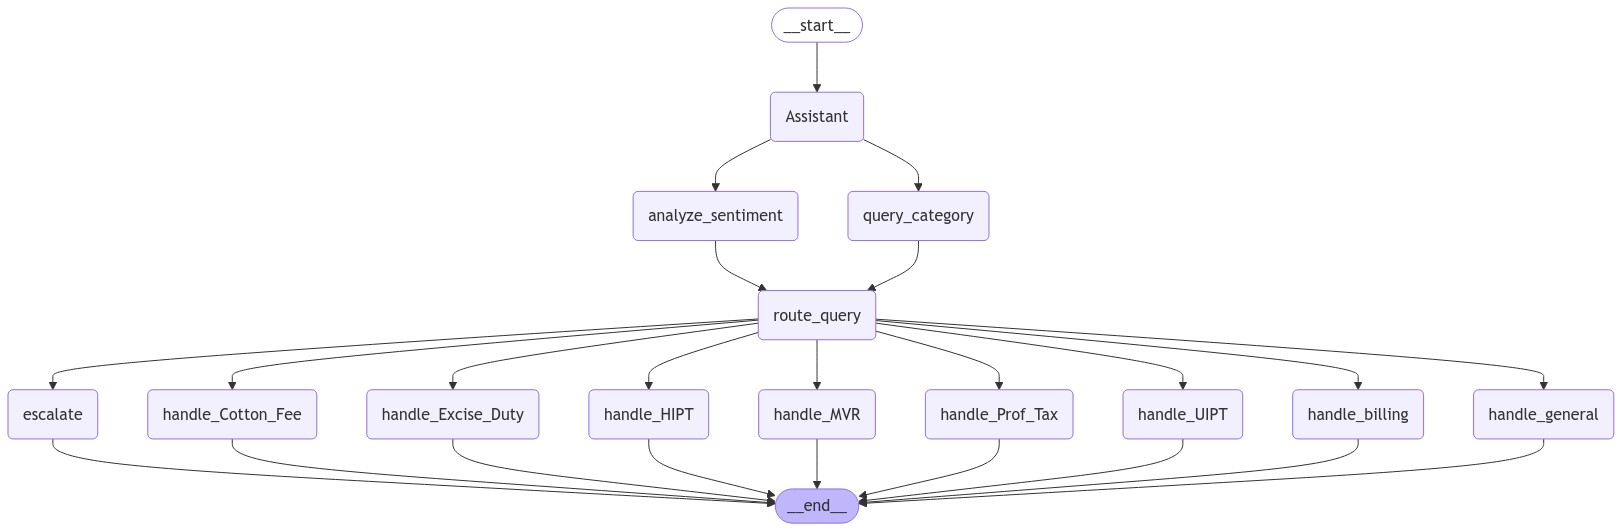

In [48]:
# prompt: print image of graph mermaid graph image print
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [52]:
response = graph.invoke(input="hi")
print(response)

InvalidUpdateError: Expected dict, got hi
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
# prompt: create graph of above functional nodes

graph = StateGraph(
    start_state={"query": ""},
    nodes={
        "categorize": categorize,
        "analyze_sentiment": analyze_sentiment,
        "handle_MVR": handle_MVR,
        "handle_UIPT": handle_UIPT,
        "handle_Prof_Tax": handle_Prof_Tax,
        "handle_HIPT": handle_HIPT,
        "handle_Excise_Duty": handle_Excise_Duty,
        "handle_Cotton_Fee": handle_Cotton_Fee,
        "handle_billing": handle_billing,
        "handle_general": handle_general,
        "escalate": escalate,
        END: None,

    },
    edges=[
        ("start_state", "analyze_sentiment"),
        ("analyze_sentiment", "categorize"),
        ("categorize", "route_query"),
        ("route_query", "handle_MVR", lambda state: state["category"] == "MVR"),
        ("route_query", "handle_UIPT", lambda state: state["category"] == "UIPT"),
        ("route_query", "handle_Prof_Tax", lambda state: state["category"] == "Prof Tax"),
        ("route_query", "handle_HIPT", lambda state: state["category"] == "HIPT"),
        ("route_query", "handle_Excise_Duty", lambda state: state["category"] == "Excise-Duty"),
        ("route_query", "handle_Cotton_Fee", lambda state: state["category"] == "Cotton_Fee"),
        ("route_query", "handle_billing", lambda state: state["category"] == "Billing"),
        ("route_query", "handle_general", lambda state: state["category"] == "General"),
        ("route_query", "escalate", lambda state: state["sentiment"] == "Negative"),
        ("handle_MVR", END),
        ("handle_UIPT", END),
        ("handle_Prof_Tax", END),
        ("handle_HIPT", END),
        ("handle_Excise_Duty", END),
        ("handle_Cotton_Fee", END),
        ("handle_billing", END),
        ("handle_general", END),
        ("escalate", END),
    ],
    draw_method=MermaidDrawMethod(),
)

display(Image(graph.draw()))

In [ ]:
import langchain


def classify_department(prompt):
    # ... (same as before)

    # If no keywords match, use LLM for classification
    llm_response = llm.invoke(prompt="Classify this prompt into a department: " + prompt)
    department = llm_response.text.strip()

    # Extract the classification keyword from the LLM response
    classification_keyword = extract_keyword(llm_response.text)

    return department, classification_keyword

condition_node = langraph.ConditionNode(
  input_keys=["prompt"],
  output_keys=["department", "classification_keyword"],
  condition_expr=classify_department
)

In [ ]:
def extract_keyword(text):
    # Extract the first word after the classification label (assuming a format like "Department: MVR")
    match = re.search(r"Department: (\w+)", text)
    if match:
        return match.group(1)
    else:
        return None  # Handle cases where no keyword is found

In [ ]:
# # Define the message state structure for state management
# class MessageState:
#     def __init__(self):
#         self.user_input = ""
#         self.previous_responses = []


In [ ]:
# Define a function to extract information from a given URL based on user query
def extract_information_from_website(url: str, query: str):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')

        # Simple keyword search logic
        paragraphs = soup.find_all('p')
        found_info = []
        for paragraph in paragraphs:
            if query.lower() in paragraph.text.lower():
                found_info.append(paragraph.text.strip())

        # If no keyword matches, extract general info
        if not found_info:
            found_info = [p.text.strip() for p in paragraphs[:3]]  # Take first three paragraphs as general info

        return " ".join(found_info) if found_info else "No relevant information found."

    except Exception as e:
        return f"An error occurred while fetching information: {str(e)}"


In [ ]:
# Define function for Excise Duty Node
def excise_duty_node(state: MessageState):
    user_input = state.user_input
    knowledge_source_url = "https://excise.punjab.gov.pk/excise_duty"
    extracted_info = extract_information_from_website(knowledge_source_url, user_input)

    if "error" in extracted_info.lower():
        response = extracted_info  # Pass the error message directly
    elif extracted_info:
        response = f"Here's what I found regarding your query on excise duty: {extracted_info}"
    else:
        response = "I'm sorry, I couldn't find specific information related to your question. Can you please rephrase it?"

    state.previous_responses.append(response)
    return {"response": response}


In [ ]:
# Define function for Motor Vehicle Tax Node
def motor_vehicle_tax_node(state: MessageState):
    user_input = state.user_input
    knowledge_source_url = "https://excise.punjab.gov.pk/motorvehicle_tax"
    extracted_info = extract_information_from_website(knowledge_source_url, user_input)

    if "error" in extracted_info.lower():
        response = extracted_info  # Pass the error message directly
    elif extracted_info:
        response = f"Here's what I found regarding your query on motor vehicle tax: {extracted_info}"
    else:
        response = "I'm sorry, I couldn't find specific information related to your question. Can you please rephrase it?"

    state.previous_responses.append(response)
    return {"response": response}


In [ ]:
# Testing the functions
test_state = MessageState()
test_state.user_input = 'What is the excise duty?'

# Test the Excise Duty Node
response = excise_duty_node(test_state)
print(response)

# Test the Motor Vehicle Tax Node
test_state.user_input = 'What about the motor vehicle tax?'
response = motor_vehicle_tax_node(test_state)
print(response)


In [ ]:
# Function to collect user feedback
def get_user_feedback():
    feedback = input("Did you find the information helpful? (yes/no): ")
    return feedback.lower() == "yes"

# Simulate feedback after a response
if response:
    if get_user_feedback():
        print("Thank you for your feedback!")
    else:
        print("I'm sorry to hear that. How can I assist you further?")


In [ ]:
# Define a main function to handle user queries
def main():
    state = MessageState()

    while True:
        state.user_input = input("Please enter your query about Excise and Taxation (or type 'exit' to quit): ")
        if state.user_input.lower() == 'exit':
            break

        # Call the relevant node based on the query (basic example)
        if "excise duty" in state.user_input.lower():
            response = excise_duty_node(state)
        elif "motor vehicle" in state.user_input.lower():
            response = motor_vehicle_tax_node(state)
        else:
            response = {"response": "I'm sorry, I couldn't understand your query. Please try again."}

        print(response['response'])

        if get_user_feedback():
            print("Thank you for your feedback!")
        else:
            print("I'm here to help further!")


In [ ]:
# Run the main function to start the interaction
main()
